In [9]:
# Load relevant R packages
inLibraries = list('repr','rgdal','rgeos')
for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

In [10]:
worldFeatures <- readOGR("datasets/world", "WorldAdmin")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/world", layer: "WorldAdmin"
with 3161 features
It has 14 fields
Integer64 fields read as strings:  OBJECTID Land_Rank 


In [11]:
summary(worldFeatures)

Object of class SpatialPolygonsDataFrame
Coordinates:
         min       max
x -180.00000 180.00000
y  -55.71535  83.66092
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
    OBJECTID          NAME     
 1      :   1   Central :  10  
 1001   :   1   Western :   9  
 1005   :   1   Northern:   7  
 1008   :   1   Eastern :   6  
 1011   :   1   Southern:   5  
 1013   :   1   (Other) :3121  
 (Other):3155   NA's    :   3  
                                      COUNTRY        ISO_CODE        ISO_CC    
 Slovenia                                 : 210   CABC   :   3   SI     : 210  
 Russian Federation                       :  99   CANT   :   3   RU     :  99  
 The Former Yugoslav Republic of Macedonia:  84   CANU   :   3   MK     :  84  
 Turkey                                   :  83   CAQC   :   3   TR     :  83  
 Philippines                              :  79   CLMA   :   3   PH     :  79  
 (Other)               

In [12]:
t(head(worldFeatures@data))

,0,1,2,3,4,5
OBJECTID,1,2,3,5,6,9
NAME,A'ana,Acre,Aiga-i-le-Tai,AisÃ©n del General Carlos IbÃ¡Ã±ez del Campo,AisÃ©n del General Carlos IbÃ¡Ã±ez del Campo,Alagoas
COUNTRY,Samoa,Brazil,Samoa,Chile,Chile,Brazil
ISO_CODE,WSAA,BRAC,WSAL,CLAI,CLAI,BRAL
ISO_CC,WS,BR,WS,CL,CL,BR
ISO_SUB,AA,AC,AL,AI,AI,AL
ADMINTYPE,District,State,District,Region,Region,State
COUNTRYAFF,Samoa,Brazil,Samoa,Chile,Chile,Brazil
CONTINENT,Oceania,South America,Oceania,South America,South America,South America
Land_Type,Medium island,Primary land,Medium island,Medium island,Primary land,Primary land


In [13]:
worldFeatures2 <- worldFeatures[!is.na(worldFeatures@data$COUNTRY), ]

In [14]:
brazil <- worldFeatures2[(worldFeatures2@data$COUNTRY == "Brazil") , ]

head(brazil@data)

,OBJECTID,NAME,COUNTRY,ISO_CODE,ISO_CC,ISO_SUB,ADMINTYPE,COUNTRYAFF,CONTINENT,Land_Type,Land_Rank,Shape_Leng,Shape_Area,sqmiles
1,2,Acre,Brazil,BRAC,BR,AC,State,Brazil,South America,Primary land,5,24.184611,12.7273718,0
5,9,Alagoas,Brazil,BRAL,BR,AL,State,Brazil,South America,Primary land,5,11.071300,2.2760259,0
19,38,Bahia,Brazil,BRBA,BR,BA,State,Brazil,South America,Primary land,5,59.891605,46.5651819,0
44,81,Distrito Federal,Brazil,BRDF,BR,DF,Federal District,Brazil,South America,Primary land,5,3.363973,0.4871103,0
49,92,EspÃ­rito Santo,Brazil,BRES,BR,ES,State,Brazil,South America,Primary land,5,17.274689,3.9763674,0
60,111,GoiÃ¡s,Brazil,BRGO,BR,GO,State,Brazil,South America,Primary land,5,39.730125,29.1040338,0


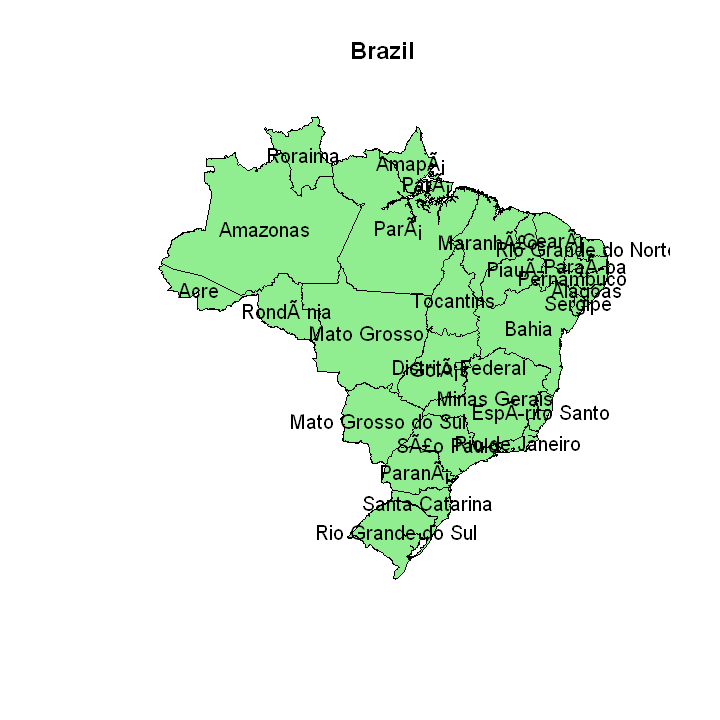

In [15]:
# plot the areas on the screen

centroids <- gCentroid(brazil, byid = TRUE)
centroidLons <- coordinates(centroids)[, 1]
centroidLats <- coordinates(centroids)[, 2]

plot(brazil, col = "lightgreen", main = "Brazil",)

# label the features with their respective administrative name and add an appropriate title to the map.

text(centroidLons, centroidLats, labels = brazil$NAME)

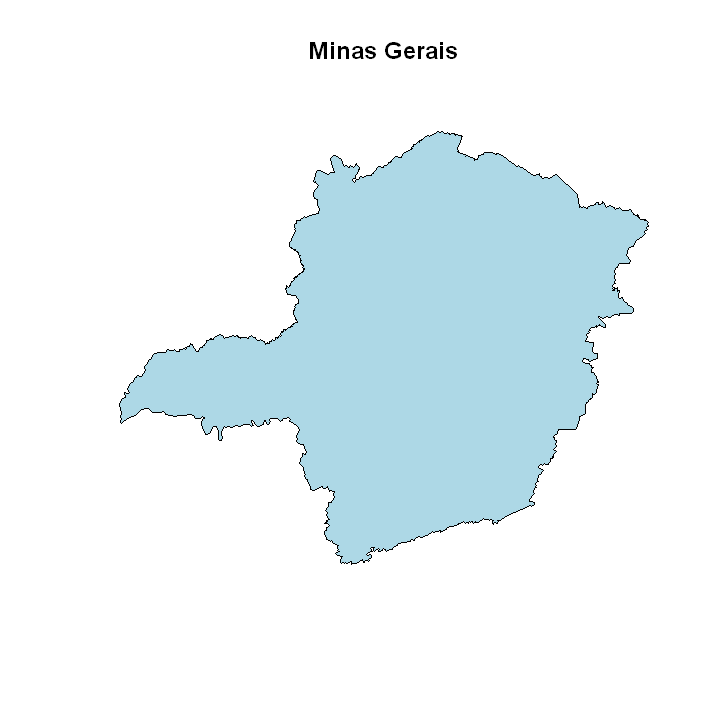

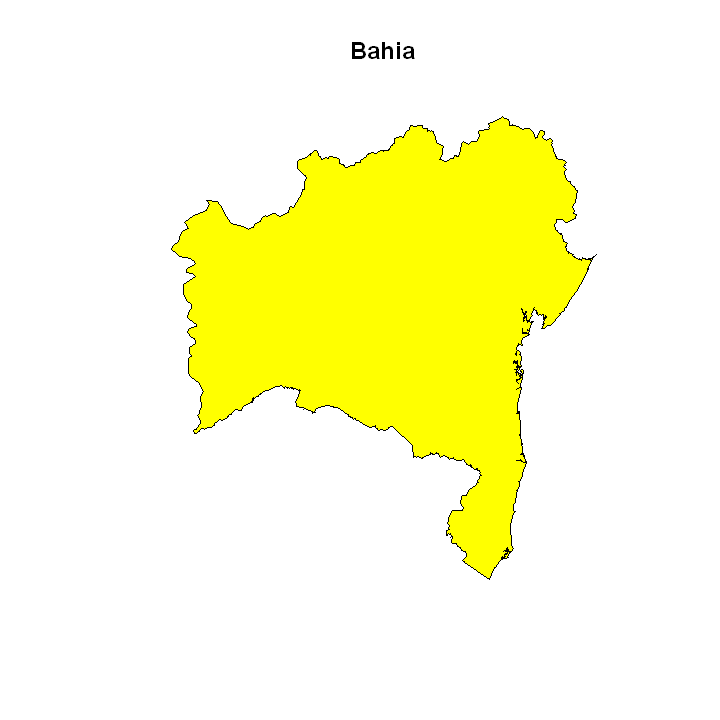

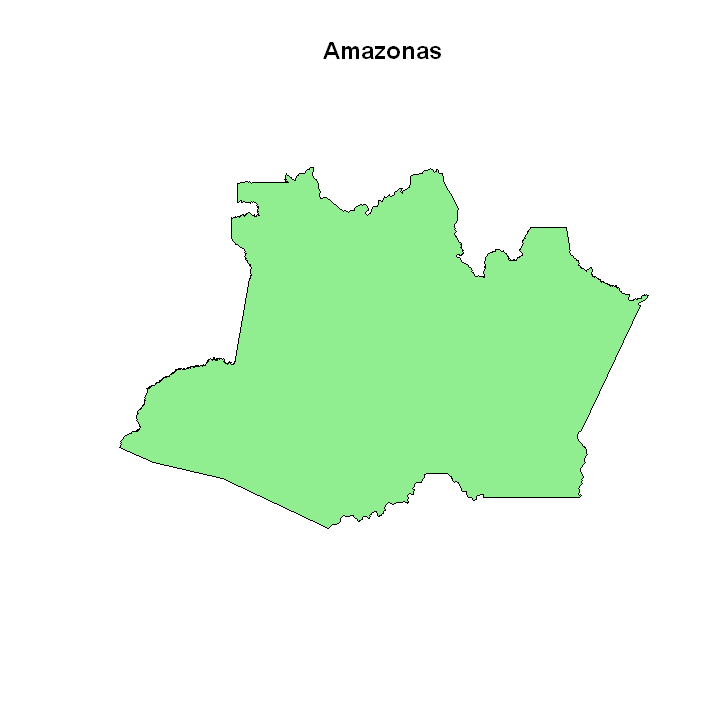

In [16]:

selectedStates <- c("Minas Gerais", "Bahia", "Amazonas")
colors <- c("lightblue", "yellow", "lightgreen")

mat <- matrix(c(selectedStates, colors), nrow = length(selectedStates))

for(r in 1:nrow(mat)) {
    
    state <- mat[r, 1]
    col <- mat[r, 2]
    
    featureSubset <- brazil[!is.na(brazil@data$NAME), ]
    stateFeatures <- featureSubset[(featureSubset@data$NAME == state) , ]
    plot(stateFeatures, col = col, main = state,)
    
}